# EXERCISE


Learning outcome 1 – 10 points

1.       Load dataset X [2 points]

2.       Describe dataset (i.e. provide shape, data types, and basic descriptive statistics) [5 points]

3.       Report the number of missing values per each feature and give your argumentation if looking for duplicate data is applicable here. [3 points]

Learning outcome 2 – 10 points

1.      Fill missing values and give your reasoning for the replacement method used [5 points]

2.       Use Y category and perform analysis for each category separately (i.e. perform descriptive statistics, and repeat the procedure from Question 1 in LO2) [5 points]

Learning outcome 3 – 10 points

1.       See if standard scaler can be used to detect outliers for features Z W [3 points]

2.       Use feature E and see if there is a significant difference for outliers in these two groups [2 points]

3.     For ZZZ.csv plot histogram of features and give any feedback on the underlying distribution of their values. Test if power law (y=a*x^b) describes the ranking analysis of country value counts.  (ranking analysis, order value counts in descending order (y-axis), position in this ranking is then x-axis). [3 points]

#LO1
1.

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('Data_mid/dataM1.csv')

In [3]:
data.head()

,Visits,Transactions,OS,Gender,Revenue
0,7,0.0,Android,Male,0.000000
1,20,1.0,iOS,NaN,576.866775
2,22,1.0,iOS,Female,850.000000
3,24,2.0,iOS,Female,1050.000000
4,1,0.0,Android,Male,0.000000


In [4]:
data.shape

(22800, 5)

In [5]:
data.dtypes

Visits            int64
Transactions    float64
OS               object
Gender           object
Revenue         float64
dtype: object

In [6]:
data.describe()

,Visits,Transactions,Revenue
count,22800.000000,21000.000000,22800.000000
mean,12.486491,0.993000,454.935251
std,7.446568,0.599696,425.988388
min,0.000000,0.000000,0.000000
25%,6.000000,1.000000,170.000000
50%,12.000000,1.000000,344.651614
75%,19.000000,1.000000,576.866775
max,25.000000,2.000000,2000.000000


In [7]:
data.describe(include=['O'])

,OS,Gender
count,22800,17400
unique,2,2
top,Android,Male
freq,16028,14730


In [8]:
data.isnull().sum()

Visits             0
Transactions    1800
OS                 0
Gender          5400
Revenue            0
dtype: int64

OL2

We can fill missing values in transaction with mean , and Gender with mode

In [9]:
# we are filling data in Transactions based on median values grouped by OS
data['Transactions'].fillna(data.groupby('OS')['Transactions'].transform('mean'),inplace=True)

In [10]:
data['Transactions'].head(2)

0    0.0
1    1.0
Name: Transactions, dtype: float64

In [11]:
data['Gender'].fillna(data['Gender'].mode()[0],inplace=True)

In [12]:
data['Gender']

0          Male
1          Male
2        Female
3        Female
4          Male
5          Male
6          Male
7          Male
8          Male
9          Male
10         Male
11         Male
12         Male
13         Male
14         Male
15       Female
16         Male
17         Male
18         Male
19         Male
20       Female
21         Male
22         Male
23         Male
24         Male
25         Male
26         Male
27         Male
28         Male
29         Male
          ...  
22770      Male
22771      Male
22772    Female
22773      Male
22774      Male
22775      Male
22776      Male
22777    Female
22778    Female
22779      Male
22780      Male
22781      Male
22782      Male
22783      Male
22784      Male
22785      Male
22786      Male
22787      Male
22788      Male
22789      Male
22790      Male
22791      Male
22792      Male
22793      Male
22794    Female
22795      Male
22796      Male
22797      Male
22798      Male
22799      Male
Name: Gender, Length: 22

In [13]:
# we filled transaction eith the mean of transactions that are goruped by OS user.
# gender is gropued by mode which means that all NaN's are filled with male since that is the most common gender

In [14]:
data.duplicated().sum()

21829

In [15]:
# we don't have to look for duplicates because we don't have specified person id or something that we can see is there any real duplicates

LO 3

1.       See if standard scaler can be used to detect outliers for features Z W [3 points]

2.       Use feature E and see if there is a significant difference for outliers in these two groups [2 points]

3.     For ZZZ.csv plot histogram of features and give any feedback on the underlying distribution of their values. Test if power law (y=a*x^b) describes the ranking analysis of country value counts.  (ranking analysis, order value counts in descending order (y-axis), position in this ranking is then x-axis). [3 points]

In [16]:
# for example we will chose category visits and revenue

In [17]:
data_num=data[['Visits','Revenue']].values

In [18]:
data_num

array([[  7.        ,   0.        ],
       [ 20.        , 576.86677497],
       [ 22.        , 850.        ],
       ...,
       [ 13.        , 390.        ],
       [  1.        ,   0.        ],
       [ 13.        , 340.        ]])

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc=StandardScaler()

In [21]:
data_num=sc.fit_transform(data_num)

([array([3433., 3524., 3604., 3512., 3461., 3602., 1664.,    0.,    0.,
            0.]),
  array([   0., 6160., 7928., 3779., 1497.,  916., 1338.,  345.,  428.,
          409.])],
 array([-1.67684836, -1.14645443, -0.6160605 , -0.08566657,  0.44472737,
         0.9751213 ,  1.50551523,  2.03590916,  2.5663031 ,  3.09669703,
         3.62709096]),
 <a list of 2 Lists of Patches objects>)

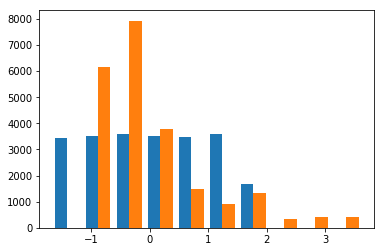

In [22]:
plt.hist(data_num)

In [23]:
data_num

array([[-0.73679736, -1.06797565],
       [ 1.00901163,  0.28623831],
       [ 1.27759763,  0.92742766],
       ...,
       [ 0.06896063, -0.15243766],
       [-1.54255536, -1.06797565],
       [ 0.06896063, -0.26981433]])

In [24]:
result=np.where(data_num > 3)

In [25]:
data_val2=np.array(data.Visits)

In [26]:
data_val2

array([ 7, 20, 22, ..., 13,  1, 13], dtype=int64)

In [27]:
data_val2=data_val2.reshape(-1,1)

In [28]:
data_val2=sc.fit_transform(data_val2)

C:\Users\Hana\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [29]:
data_val2

array([[-0.73679736],
       [ 1.00901163],
       [ 1.27759763],
       ...,
       [ 0.06896063],
       [-1.54255536],
       [ 0.06896063]])

(array([2536., 1783., 2638., 2683., 1848., 2585., 1794., 2568., 1847.,
        2518.]),
 array([-1.67684836, -1.34111586, -1.00538336, -0.66965086, -0.33391837,
         0.00181413,  0.33754663,  0.67327913,  1.00901163,  1.34474413,
         1.68047663]),
 <a list of 10 Patch objects>)

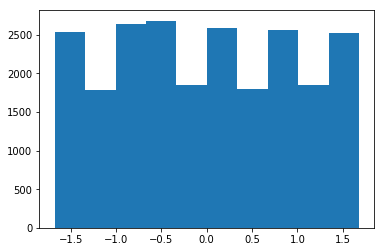

In [30]:
plt.hist(data_val2)

In [31]:
data_rev=np.array(data['Revenue'])

In [32]:
data_rev=data_rev.reshape(-1,1)

In [33]:
data_rev=sc.fit_transform(data_rev)

(array([6160., 7320., 4300., 1128., 1139.,  509., 1141.,  342.,  352.,
         409.]),
 array([-1.06797565, -0.59846899, -0.12896233,  0.34054433,  0.81005099,
         1.27955765,  1.74906431,  2.21857098,  2.68807764,  3.1575843 ,
         3.62709096]),
 <a list of 10 Patch objects>)

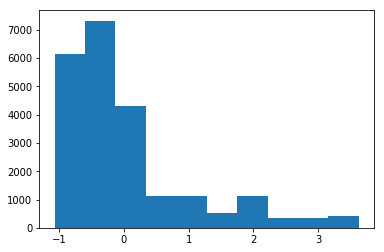

In [34]:
plt.hist(data_rev)

In [35]:
out=data_rev[data_rev > 3]

In [36]:
out

array([3.27496097, 3.5097143 , 3.27496097, 3.5097143 , 3.27496097,
       3.27496097, 3.27496097, 3.04020763, 3.62709096, 3.1575843 ,
       3.62709096, 3.39233763, 3.27496097, 3.04020763, 3.1575843 ,
       3.62709096, 3.39233763, 3.62709096, 3.5097143 , 3.39233763,
       3.62709096, 3.1575843 , 3.5097143 , 3.62709096, 3.27496097,
       3.62709096, 3.1575843 , 3.62709096, 3.39233763, 3.1575843 ,
       3.27496097, 3.1575843 , 3.1575843 , 3.62709096, 3.62709096,
       3.04020763, 3.04020763, 3.5097143 , 3.39233763, 3.62709096,
       3.5097143 , 3.62709096, 3.1575843 , 3.04020763, 3.1575843 ,
       3.1575843 , 3.27496097, 3.04020763, 3.5097143 , 3.1575843 ,
       3.04020763, 3.62709096, 3.1575843 , 3.62709096, 3.39233763,
       3.5097143 , 3.39233763, 3.39233763, 3.27496097, 3.5097143 ,
       3.04020763, 3.04020763, 3.04020763, 3.5097143 , 3.04020763,
       3.39233763, 3.39233763, 3.04020763, 3.62709096, 3.04020763,
       3.04020763, 3.39233763, 3.62709096, 3.1575843 , 3.27496

In [37]:
data_tri=data[['Visits','Transactions','Revenue']].values

In [38]:
data_tri=sc.fit_transform(data_tri)

([array([3433., 3524., 3604., 3512., 3461., 3602., 1664.,    0.,    0.,
            0.]),
  array([ 3850.,     0.,  1586., 13447.,   214.,     0.,  3703.,     0.,
             0.,     0.]),
  array([   0., 6009., 8079., 3779., 1497.,  916., 1338.,  345.,  428.,
          409.])],
 array([-1.68657232, -1.15520599, -0.62383966, -0.09247333,  0.438893  ,
         0.97025932,  1.50162565,  2.03299198,  2.56435831,  3.09572463,
         3.62709096]),
 <a list of 3 Lists of Patches objects>)

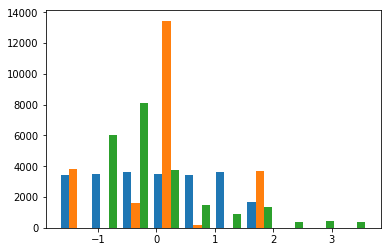

In [39]:
plt.hist(data_tri)

In [40]:
import statsmodels.formula.api as sm

In [41]:
result=sm.ols(formula='Revenue ~ Visits + Transactions',data=data).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Revenue   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.708
Method:                 Least Squares   F-statistic:                 2.760e+04
Date:                Thu, 02 May 2019   Prob (F-statistic):               0.00
Time:                        13:44:51   Log-Likelihood:            -1.5637e+05
No. Observations:               22800   AIC:                         3.127e+05
Df Residuals:                   22797   BIC:                         3.128e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -182.6113      3.134    -58.266      0.000    -188.754    -176.468
Visits          15.7286      0.313     50.309      0.000      15.116      16.341
Transactions   449.7718      4.003    112.355      0.000     441.925     457.618
==============================================================================
Omnibus:                     3426.175   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9129.837
Skew:                           0.829   Prob(JB):                         0.00
Kurtosis:                       5.620   Cond. No.                         40.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* R^2 - % of variation in the data that can be accounted for regression
* p-value - probability that the inedepenedet var has no effect on the dependet var.

* rev=449.77* transactions + 15.7286* visits

In [42]:
#if we enter gender

OL3

In [43]:
movie=pd.read_csv('Data_mid/movie_metadata.csv')

In [44]:
movie.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [45]:
movie.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [46]:
movie.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [47]:
movie.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

In [48]:
movie.isnull().sum()

color                         19
director_name                104
num_critic_for_reviews        50
duration                      15
director_facebook_likes      104
actor_3_facebook_likes        23
actor_2_name                  13
actor_1_facebook_likes         7
gross                        884
genres                         0
actor_1_name                   7
movie_title                    0
num_voted_users                0
cast_total_facebook_likes      0
actor_3_name                  23
facenumber_in_poster          13
plot_keywords                153
movie_imdb_link                0
num_user_for_reviews          21
language                      12
country                        5
content_rating               303
budget                       492
title_year                   108
actor_2_facebook_likes        13
imdb_score                     0
aspect_ratio                 329
movie_facebook_likes           0
dtype: int64

In [49]:
movie_drop=movie.dropna()

In [50]:
movie_drop.shape

(3756, 28)

In [51]:
movie.shape

(5043, 28)

In [52]:
movie_drop.shape[0]/movie.shape[0]

0.744794765020821

(array([1056., 1184.,  729.,  389.,  193.,  113.,   50.,   21.,   13.,
           8.]),
 array([  2. ,  83.1, 164.2, 245.3, 326.4, 407.5, 488.6, 569.7, 650.8,
        731.9, 813. ]),
 <a list of 10 Patch objects>)

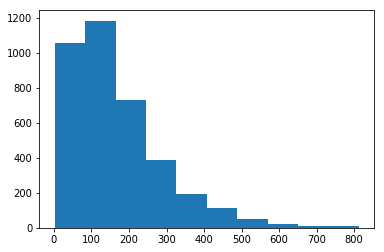

In [53]:
plt.hist(movie_drop['num_critic_for_reviews'])

In [54]:
import seaborn as sns

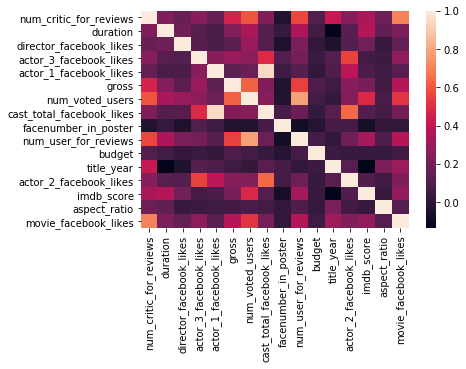

In [55]:
sns.heatmap(movie_drop.corr())

(array([3.441e+03, 2.180e+02, 5.500e+01, 2.600e+01, 1.000e+01, 5.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([     0.,  34900.,  69800., 104700., 139600., 174500., 209400.,
        244300., 279200., 314100., 349000.]),
 <a list of 10 Patch objects>)

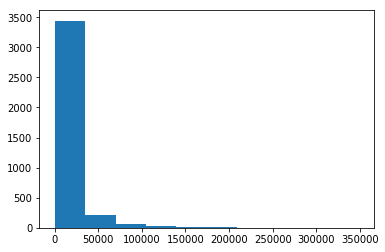

In [56]:
plt.hist(movie_drop['movie_facebook_likes'])

In [57]:
data_mov=pd.DataFrame(movie_drop.country.value_counts())

In [58]:
data_mov.index.names=['Countries']

In [59]:
data_mov.columns=['Number of countries']

In [60]:
data_mov.head()

,Number of countries
Countries,
USA,2987
UK,318
France,101
Germany,80
Canada,59


In [61]:
data_mov.reset_index()

,Countries,Number of countries
0,USA,2987
1,UK,318
2,France,101
3,Germany,80
4,Canada,59
5,Australia,39
6,Spain,21
7,Japan,15
8,Hong Kong,13
9,China,13


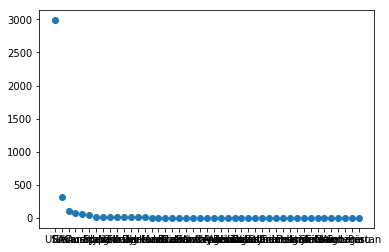

In [62]:
plt.scatter(x=data_mov.index, y=data_mov['Number of countries'])

In [63]:
#changing order from desc to ascend.

In [64]:
data_mov['Movie_ranked']=data_mov['Number of countries'].rank(ascending=0)

In [65]:
data_mov.head()

,Number of countries,Movie_ranked
Countries,,
USA,2987,1.0
UK,318,2.0
France,101,3.0
Germany,80,4.0
Canada,59,5.0


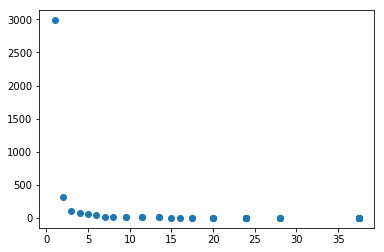

In [66]:
plt.scatter(x=data_mov['Movie_ranked'],y=data_mov['Number of countries'])

In [67]:
# bottom 10 countries

In [68]:
#pivot tables
import pandas as pd

In [71]:
pd.pivot_table(movie_drop,values=['actor_1_facebook_likes','actor_2_facebook_likes'],index=['movie_title'],aggfunc='mean')

,actor_1_facebook_likes,actor_2_facebook_likes
movie_title,,
10 Cloverfield Lane,14000.0,338.0
10 Things I Hate About You,23000.0,13000.0
102 Dalmatians,2000.0,795.0
10th & Wolf,954.0,551.0
12 Rounds,969.0,794.0
12 Years a Slave,2000.0,660.0
127 Hours,11000.0,642.0
13 Going on 30,3000.0,2000.0
13 Hours,769.0,726.0
